In [3]:
import matplotlib.pyplot as plt
#원래는 pyplot 이 아니었다. 
# 원래는 matplotlib.pylab 이었다. => matlab 과 똑같이 쓸 수 있는 애였는데,
# 문제가 있었다. matlab 은 어떤 라이브러리를 import를 하지 않는다. 그러려면, 별표 import 를 써야하는데
# 충돌이많고, 메모리 낭비가 많았다. 그래서 공식 사이트에서 더이상 쓰지말라고 권장했다함. 
# pylab 사용할때는 states machine 기반이었다가
# pyplot 하면서부터 객체지향 기반이 되었다.

In [4]:
# 우선, 그래프 한땀한땀 그리기 위해서 그림을 그릴 가상의 공간을 만든다.
plt.figure()

#이 가상의 공간에는 여러개의 그래프가 존재하는 공간이다. 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

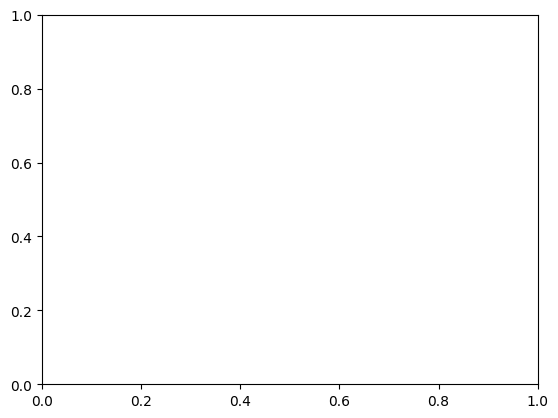

In [5]:
#이 공간에 실제 그래프를 띄운다.
plt.axes()
#이 가상의 공간에는 동시에 여러개의 그래프를 띄울 수 있다. 


#### 가상의 공간을 안 만들고 그래프 그려보기

<Axes: >

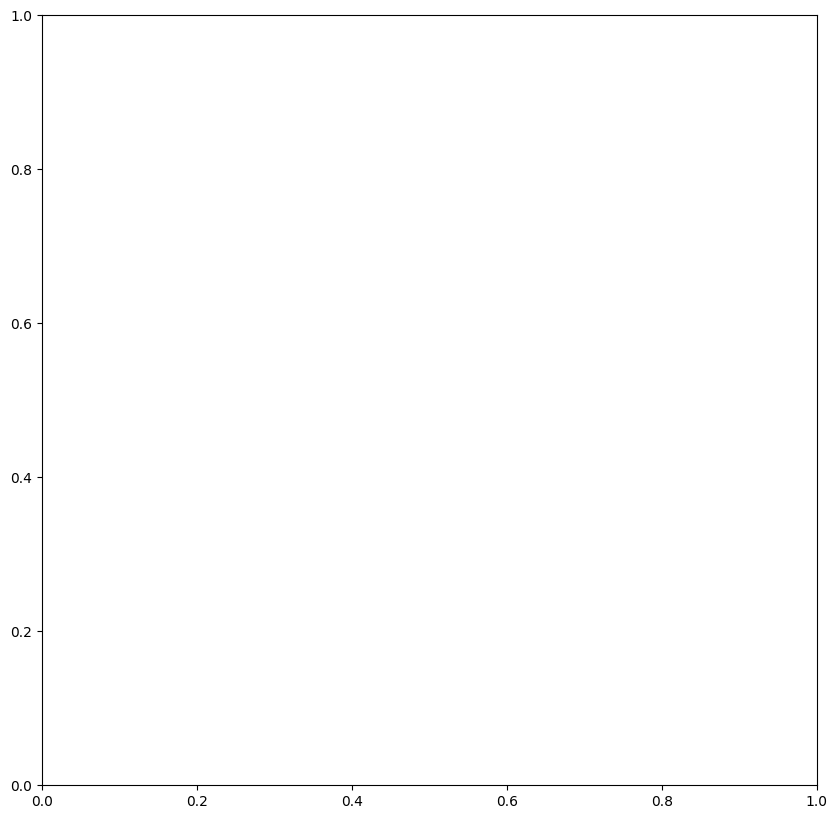

In [8]:
# plt.axes()
#plt.figure 를 굳이 먼저 만들지 않고, 알아서 찾아서 가상의 공간을 만들어줬다. 
# <Figure size 640x480 with 0 Axes> 를 기본적으로 만들어준다. 이걸 바꾸고 싶다면?
plt.figure(figsize=(10, 10))
plt.axes()


<Axes: >

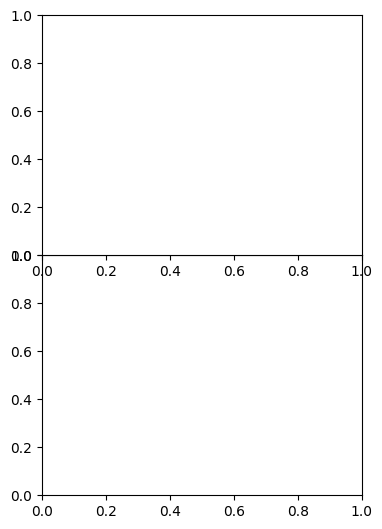

In [12]:
# axes를 여러개 만들수도 있다. 비율로. 
plt.axes((0,0,0.5, 0.5)) #0.0에서 1/2씩 그래프를 그려라는 뜻. 
plt.axes((0,0.5, 0.5, 0.5)) #위에서 figure 를 만들었기에 그 위에 이 그래프를 또 얹는거다. 

#### 3단계: 실제 그래프를 그릴 차례.

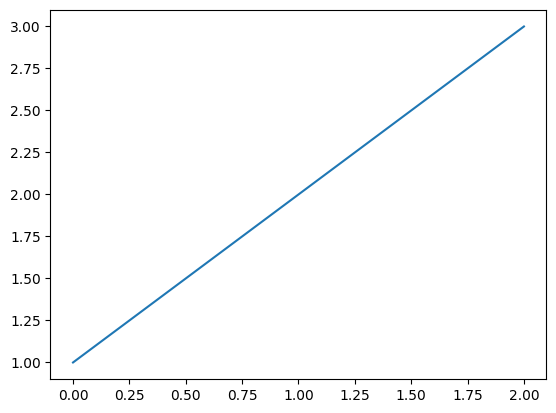

In [13]:
plt.plot([1,2,3])

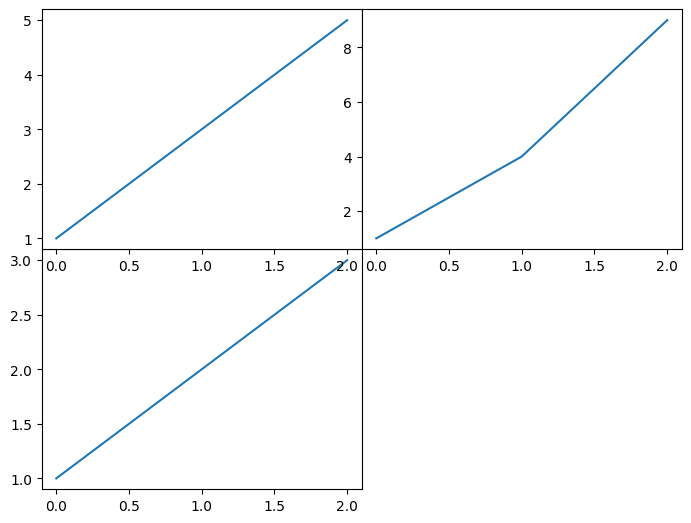

In [17]:
plt.axes((0,0,0.5, 0.5)) #0.0에서 1/2씩 그래프를 그려라는 뜻. 
plt.plot([1,2,3])

plt.axes((0,0.5, 0.5, 0.5))
plt.plot([1,3,5])

plt.axes((0.5,0.5, 0.5, 0.5))
plt.plot([1,4,9])

<Axes: >

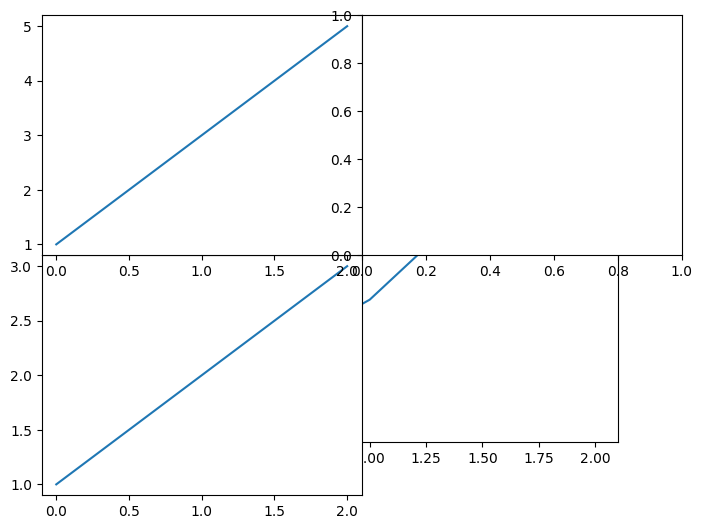

In [18]:
plt.plot([1,4,9]) #axes가 없다. 그니까 나름대로 figure 찾아서 그래프 그린거란거다..
plt.axes((0,0,0.5, 0.5)) 
plt.plot([1,2,3])

plt.axes((0,0.5, 0.5, 0.5))
plt.plot([1,3,5])

plt.axes((0.5,0.5, 0.5, 0.5))


#### 아주 빨리 편하게 그릴수 있어서 좋지만, 객체지향이 아니라서 헷갈려 죽는다

## 판다스로 그래프 쉽게 그려보기

In [20]:
import seaborn as sns

In [21]:
tips = sns.load_dataset('tips')

In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### x축이 인덱스다. 
라는것만 기억하면 판다스 그래프 그리는거 쉽다.

## aggregation

#### 분류 <-> 구분
groupby <-> split 

In [27]:
tips.groupby('sex')['tip'].mean()
#tip 에 대해서 묶어주세요.
#fancy_indexing 쓰면 1차로 보이는 이 결과를 2차로 보이게 할 수 있다.

C:\Users\user\AppData\Local\Temp\ipykernel_2784\1205357774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [28]:
#이걸 SAC 라고 한다. aggreation
tips.groupby('sex')[['tip']].mean()
#근데 이거 몇명이 왔는지와 전체식사값이 얼마인지를 고려하지 않은거라서, 잘못된 통계인거다!

C:\Users\user\AppData\Local\Temp\ipykernel_2784\3550631252.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')[['tip']].mean()


,tip
sex,
Male,3.089618
Female,2.833448


### 성별과 몇명왔는지도 알고 싶다면?
조건을 여러개 붙여주면 된다.

In [29]:
tips.groupby(['sex', 'size'])[['tip']].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_2784\478715695.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex', 'size'])[['tip']].mean()


tip
sex    size          
Male   1     1.920000
       2     2.614184
       3     3.476667
       4     4.172143
       5     3.750000
       6     5.850000
Female 1     1.276667
       2     2.528448
       3     3.250000
       4     4.021111
       5     5.140000
       6     4.600000

In [31]:
tips.groupby(['sex'])[['tip']].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_2784\446783252.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex'])[['tip']].mean()


,tip
sex,
Male,3.089618
Female,2.833448


C:\Users\user\AppData\Local\Temp\ipykernel_2784\4206925849.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex'])[['tip']].mean().plot(kind='bar')


<Axes: xlabel='sex'>

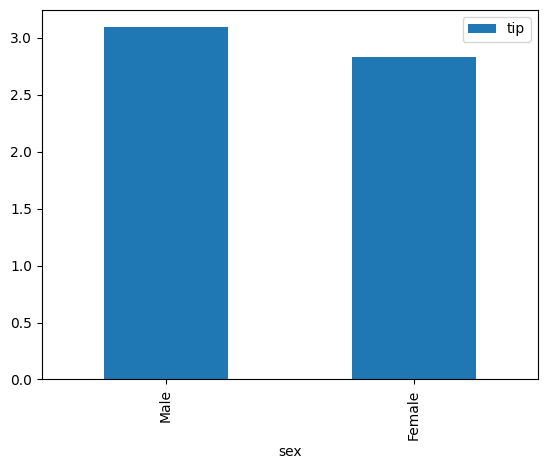

In [54]:
tips.groupby(['sex'])[['tip']].mean().plot(kind='bar')
#1. plot() 안에 그래프 종류를 집어넣거나.
# 2. plot. 으로 자동완성하면 버그가 있는 편인데. 

C:\Users\user\AppData\Local\Temp\ipykernel_2784\437050127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = tips.groupby(['sex'])[['tip']].mean().plot.bar()


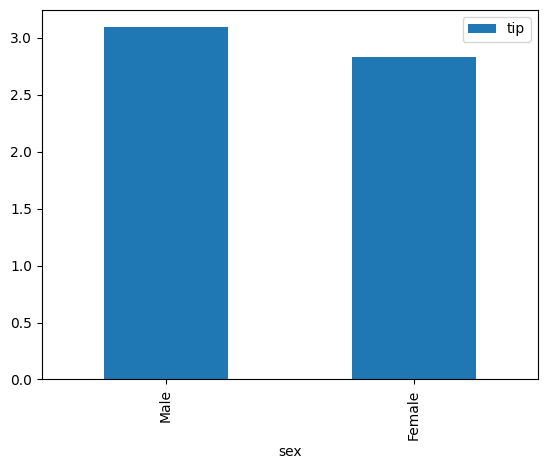

In [34]:
x = tips.groupby(['sex'])[['tip']].mean().plot.bar()

In [ ]:
tips.groupby(['sex'])[['tip']].mean().plot()

In [41]:
m= tips[tips.sex =='Male']['tip'].values
#numpy 형태로 바꿔준 데이터 형태다. 

In [40]:
f=tips[tips.sex =='Female']['tip'].values

In [42]:
mm = m.mean()
ff = f.mean()

Text(0.5, 1.0, 'sex')

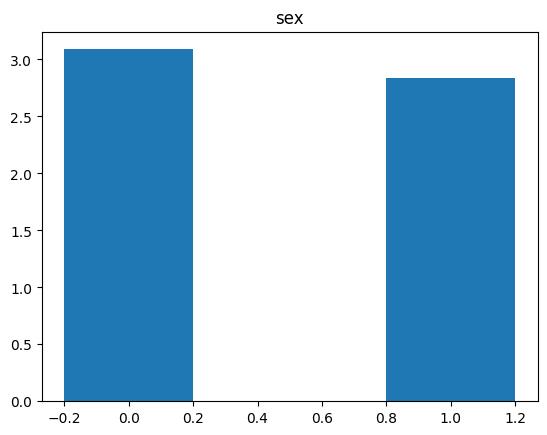

In [47]:
plt.bar(([0,1]),[mm,ff], width=0.4)
plt.title('sex')
#이렇게 하나하나 수작업으로 설정해줘야하는게 matplotlib.... 개 귀찮군

In [48]:
x = tips.groupby(['sex'])[['tip']].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_2784\3532842541.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = tips.groupby(['sex'])[['tip']].mean()


In [ ]:
x.plot()

(2.0, 3.0)

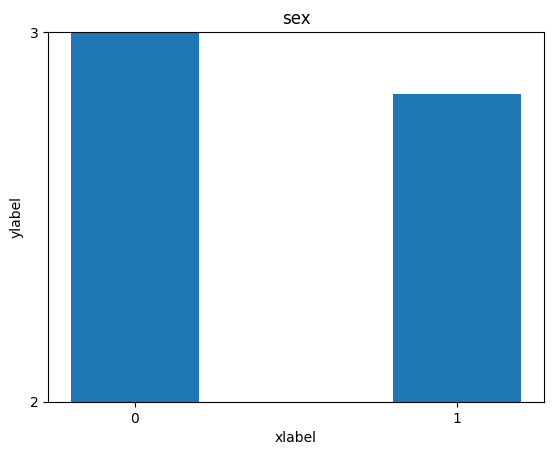

In [53]:
plt.bar(([0,1]),[mm,ff], width=0.4)
plt.title('sex')
plt.xticks([0,1])
#0과 1만 존재
plt.xlabel('xlabel')
plt.yticks([1,2,3])
plt.ylabel('ylabel')
plt.ylim([2,3]) #y축이 2~3까지만 그래프 그림 

In [55]:
#위 모든걸 판다스로 한큐에 가능하지만, 디테일하게 커스텀은 힘들다는 거다. 

C:\Users\user\AppData\Local\Temp\ipykernel_2784\1523723986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex'])[['tip']].mean().plot(kind='bar')


(2.0, 3.0)

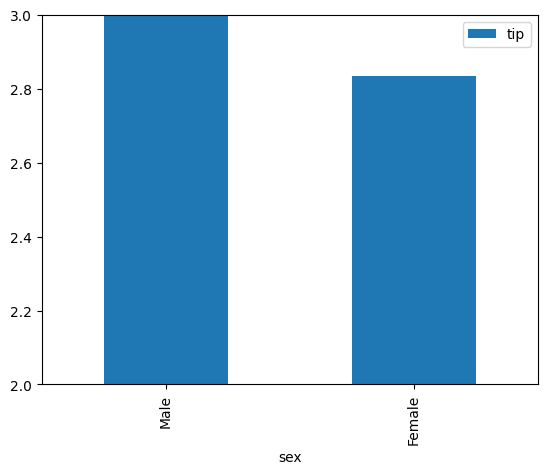

In [57]:
tips.groupby(['sex'])[['tip']].mean().plot(kind='bar')
plt.ylim([2,3])

# Figure

In [58]:
# figure 는 기본인거다. state machine 개념으로. 
# 순서 민감하다. 순서로 판단하기 때문에. 
# 가상의 크기는 default 값이 제공되나, 크기 변경이 가능하다. 
# figure 안에 여러 개의 axes 축을 넣을 수 있는데, 상대적인 크기로. 
# 중요한건 극 좌표계를 그릴 수 있다. polar graph : 반지름과 각도로 값을 그래프로 그리는거임. 

In [59]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

(2.0, 3.0)

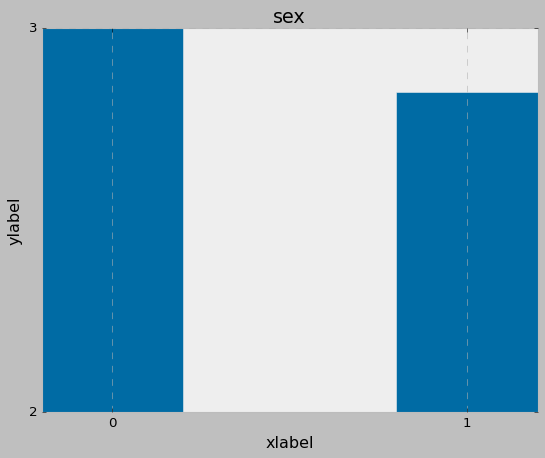

In [68]:
plt.style.use('tableau-colorblind10')
#이 설정 뒤에 나오는 그래프는 ggplot 스타일대로 그려지는거다!
#이렇게 설정하면 판다스로 만든 그래프도 자동적으로 적용이 된다.

plt.bar(([0,1]),[mm,ff], width=0.4)
plt.title('sex')
plt.xticks([0,1])
#0과 1만 존재
plt.xlabel('xlabel')
plt.yticks([1,2,3])
plt.ylabel('ylabel')
plt.ylim([2,3])

In [69]:
#모든 요소에 폰트까지 정할 수 있다. 
#문제는 기본 폰트가 한글이 안된다. 기본폰트를 한글로 처리하는 방법은?
#오늘은 안배울거임

### 범례

C:\Users\user\AppData\Local\Temp\ipykernel_2784\4292618620.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex'])['tip'].mean().plot(kind='bar')


<Axes: xlabel='sex'>

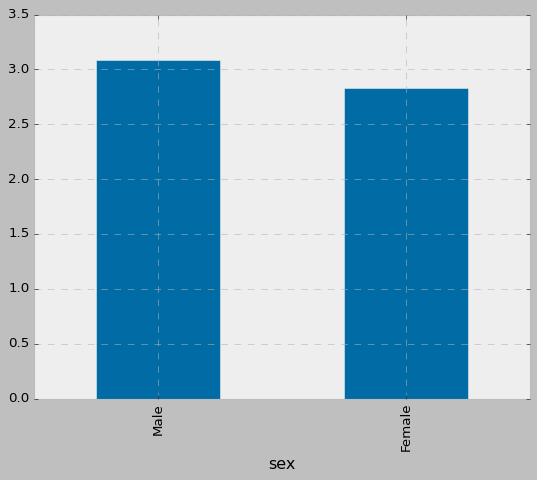

In [74]:
tips.groupby(['sex'])['tip'].mean().plot(kind='bar')

C:\Users\user\AppData\Local\Temp\ipykernel_2784\111055412.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex'])[['tip', 'total_bill']].mean().plot(kind='bar')


<Axes: xlabel='sex'>

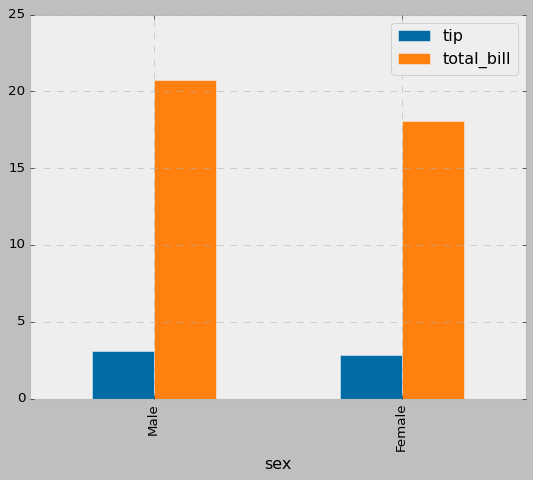

In [72]:
tips.groupby(['sex'])[['tip', 'total_bill']].mean().plot(kind='bar')
#2차로 그리면 legend 공간이 생긴다. 

C:\Users\user\AppData\Local\Temp\ipykernel_2784\3153130392.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex'])[['tip', 'total_bill']].mean().plot.bar(stacked=True)


<Axes: xlabel='sex'>

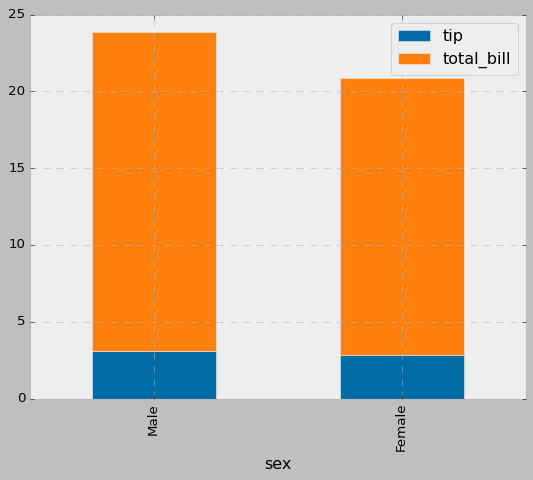

In [75]:
tips.groupby(['sex'])[['tip', 'total_bill']].mean().plot.bar(stacked=True)
#  stacked=True 는 겹쳐서 보이게 해준다. 

In [76]:
#legend 색깔, 폰트 도 다 바꿀수 있다. 

## 그래프의 종류

In [77]:
x = tips.groupby(['sex'])[['tip', 'total_bill']].mean().plot

C:\Users\user\AppData\Local\Temp\ipykernel_2784\3757193530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = tips.groupby(['sex'])[['tip', 'total_bill']].mean().plot


<Axes: xlabel='sex'>

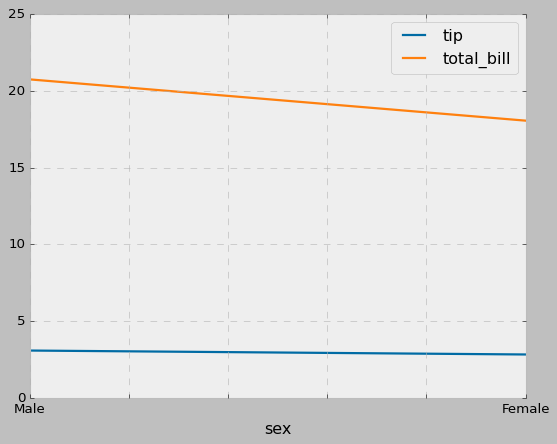

In [78]:
x.line()

# 동시에 여러개 그래프 그리기 <- 객체지향 방식

<Axes: >

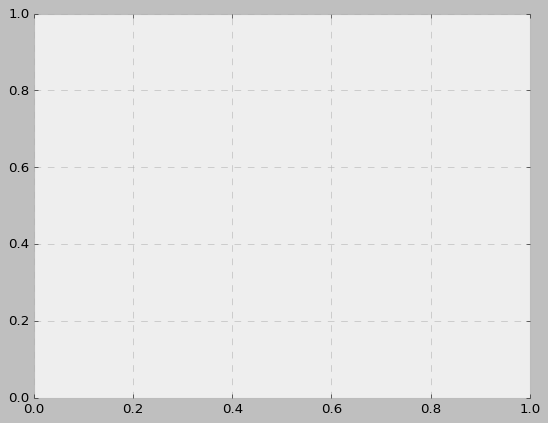

In [79]:
plt.subplot()
#out 이 1개라는 거다. 

<Axes: >

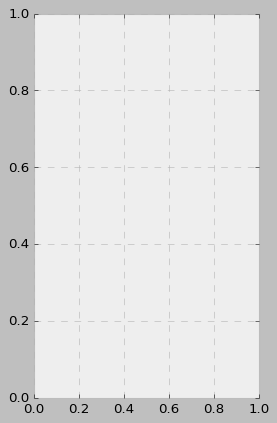

In [82]:
plt.subplot(121)
#1행2열인데 1번째 그래프다. 

<Axes: >

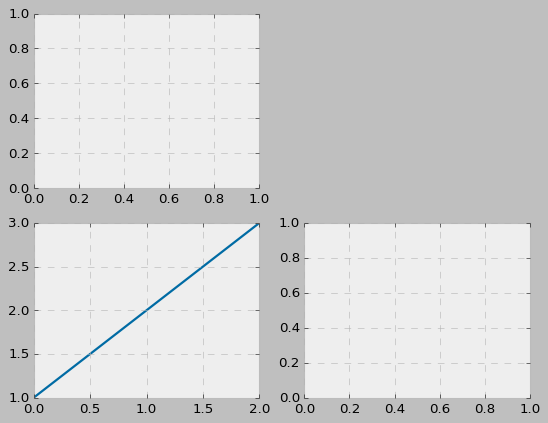

In [86]:
plt.subplot(221)
plt.subplot(223)
plt.plot([1,2,3])
plt.subplot(224)

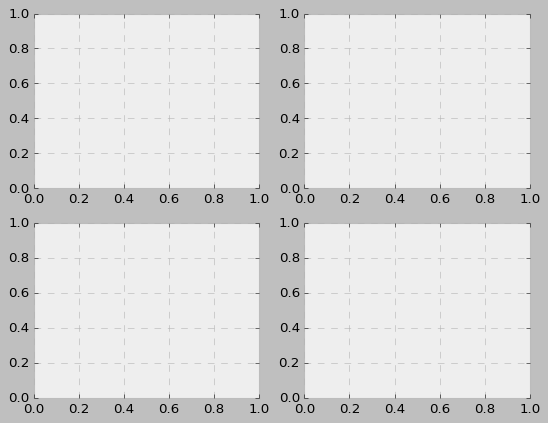

In [87]:
for i in range(1,5):
    plt.subplot(2,2,i)
    #이게 판다스가 못하는 거라고 한다. 
    # 판다스 젤 잘쓰는 사람은 판다스 외부의 것들을 조합해서 쓸 수 있는 사람이라는 거다. 

# 객체지향 테크닉

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

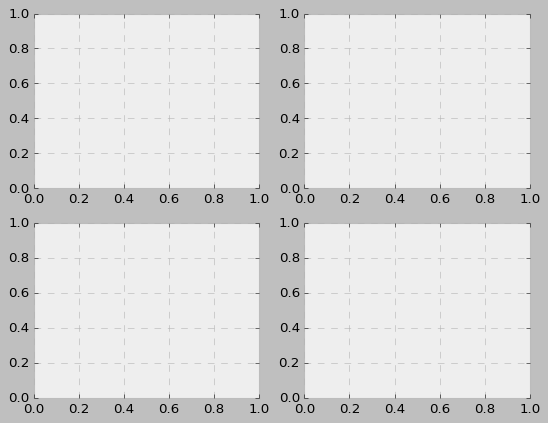

In [90]:
#s가 붙어있을때는 객체지향이다.
plt.subplots(2,2)

2

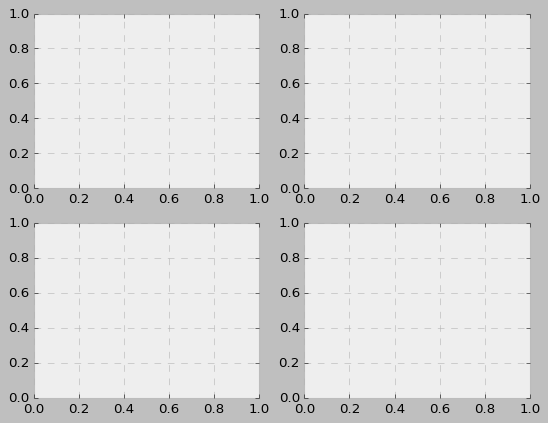

In [91]:
#개수를 알고싶을때
len(plt.subplots(2,2))

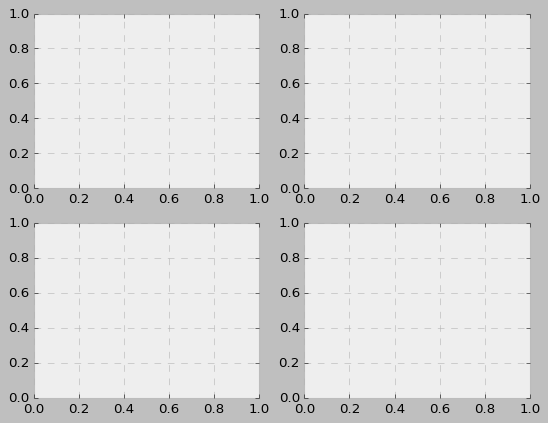

In [92]:
a, b = plt.subplots(2,2)
# a = fig / b = axes 인거다.

Text(0.5, 1.0, '4')

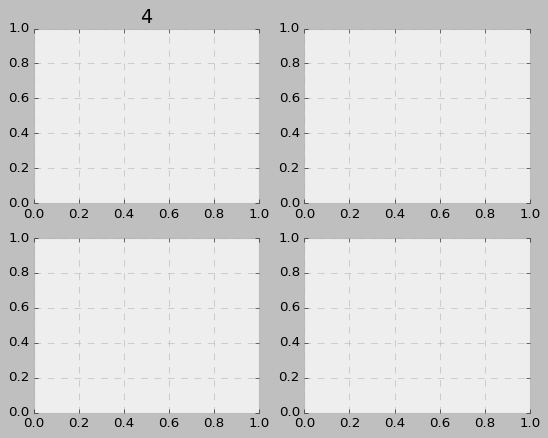

In [100]:
a, b = plt.subplots(2,2)
b[0,0].set_title('1')
b[0,0].set_title('4')
# state machine 기법에서는 어떤애를 바꿀건지 지정해주지 않아도 알아서 됐지만, 
# 객체지향 방식에서는 찝어줘야한다. 명령어도 다르다. set_title 명령어가 들어간다. (get, set 개념)

In [103]:
from sklearn.datasets import load_breast_cancer

In [104]:
data = load_breast_cancer(as_frame=True)
# as_frame=True 로 쓰면 데이터프레임으로 보여준다는거다. -> 판다스로 보여준다는거.

In [106]:
data

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

<Axes: >

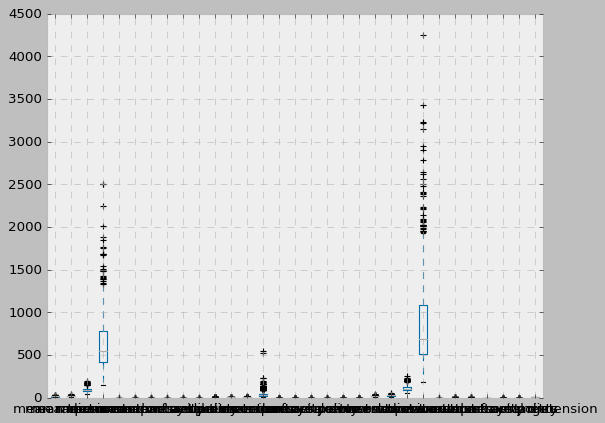

In [107]:
data.frame.boxplot()

# seaborn

In [ ]:
#시행착오를 일부러 해볼거다.
# boxplot 을 categorical 데이터에 그릴수 있을까?
# categorical / numerical 데이터 2가지로 나뉘는데, 


In [108]:
sns.__version__

'0.12.2'

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

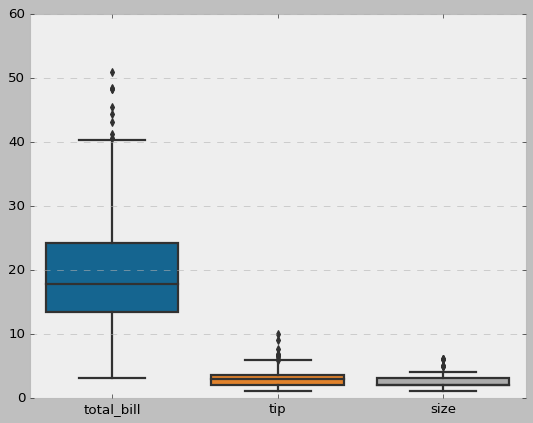

In [110]:
sns.boxplot(tips)
#수치형 컬럼 3개에 대해서 그려준다. . . 

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='tip'>

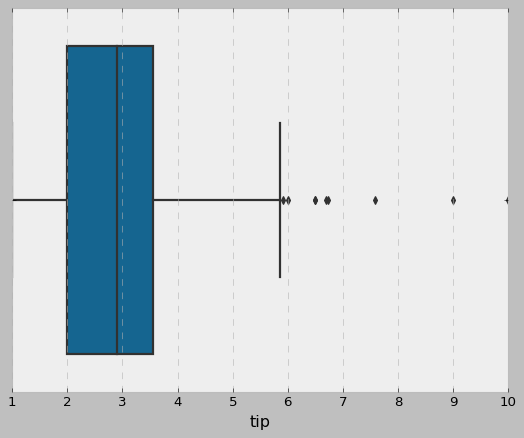

In [113]:
#시행착오 시작
sns.boxplot(tips, x='tip')
#x의 tip의 값을 기준으로 그려준다.

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='tip'>

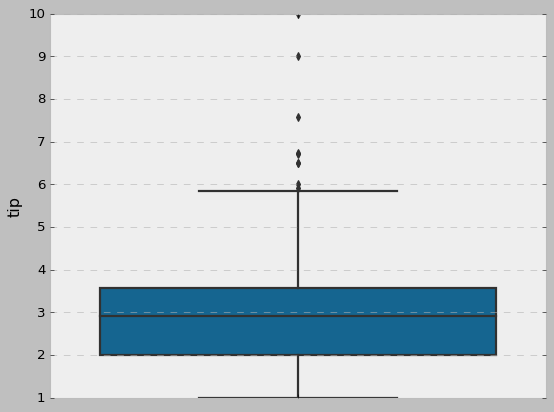

In [114]:
sns.boxplot(tips, y='tip')

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='sex', ylabel='tip'>

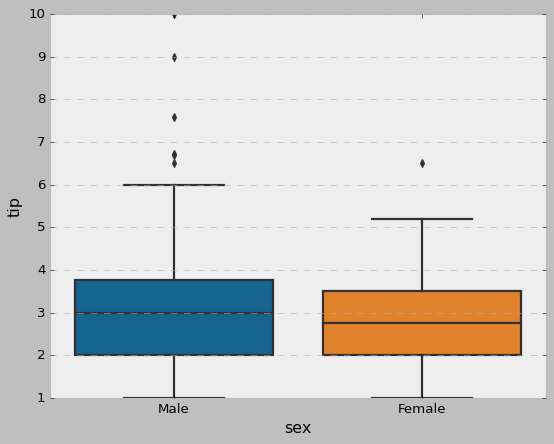

In [115]:
sns.boxplot(tips, x='sex', y='tip')
#남자의 경우 outlier 이상치들이 많은게 보인다. 여자들은 범위가 작다. 편차가 적다. 

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='tip'>

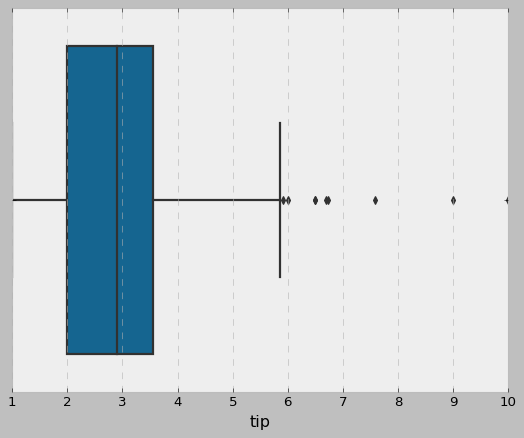

In [117]:
sns.boxplot(tips, x='tip')
#tip에 대한 모든 값을 나열해서 그려라는거다. 

<Axes: >

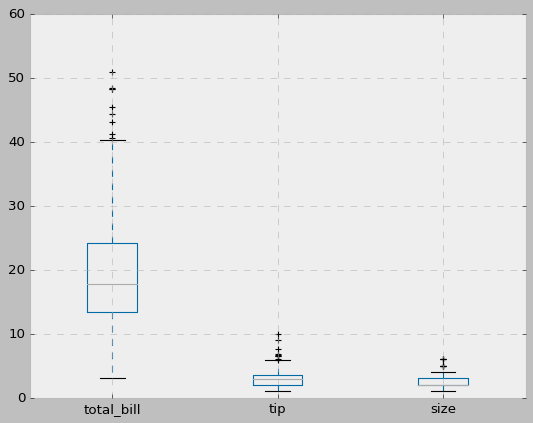

In [122]:
# tips.boxplot(tips, x='tip') #판다스에서는 이렇게 x값 찝어서 설정이 안된다. 에러난다.
tips.boxplot()

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='tip'>

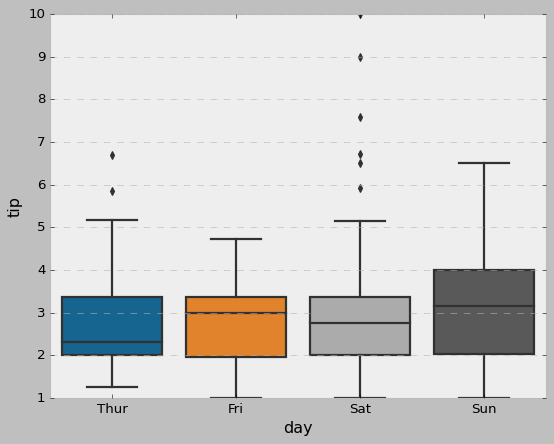

In [123]:
sns.boxplot(tips, x='day',y='tip')

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\catego

<Axes: xlabel='day', ylabel='tip'>

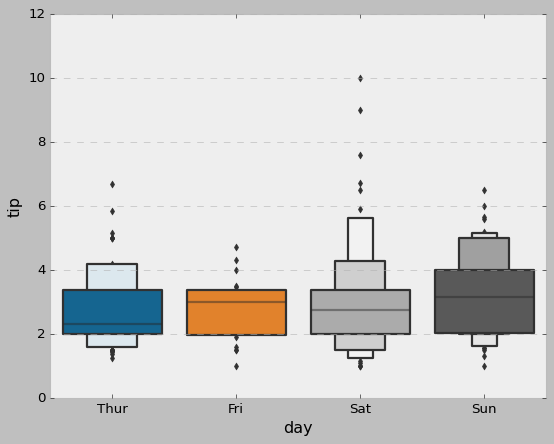

In [124]:
sns.boxenplot(tips, x='day',y='tip')

In [125]:
iris = sns.load_dataset('iris')

In [126]:
import pandas as pd

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

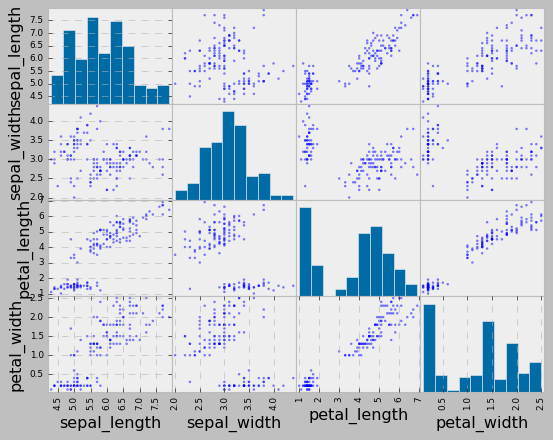

In [127]:
#pandas 에서도 이렇게 고급스러운 그래프 그려볼 수 있다.
pd.plotting.scatter_matrix(iris)
#하지만 카테고리컬 정보는 안된다고 함. 

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

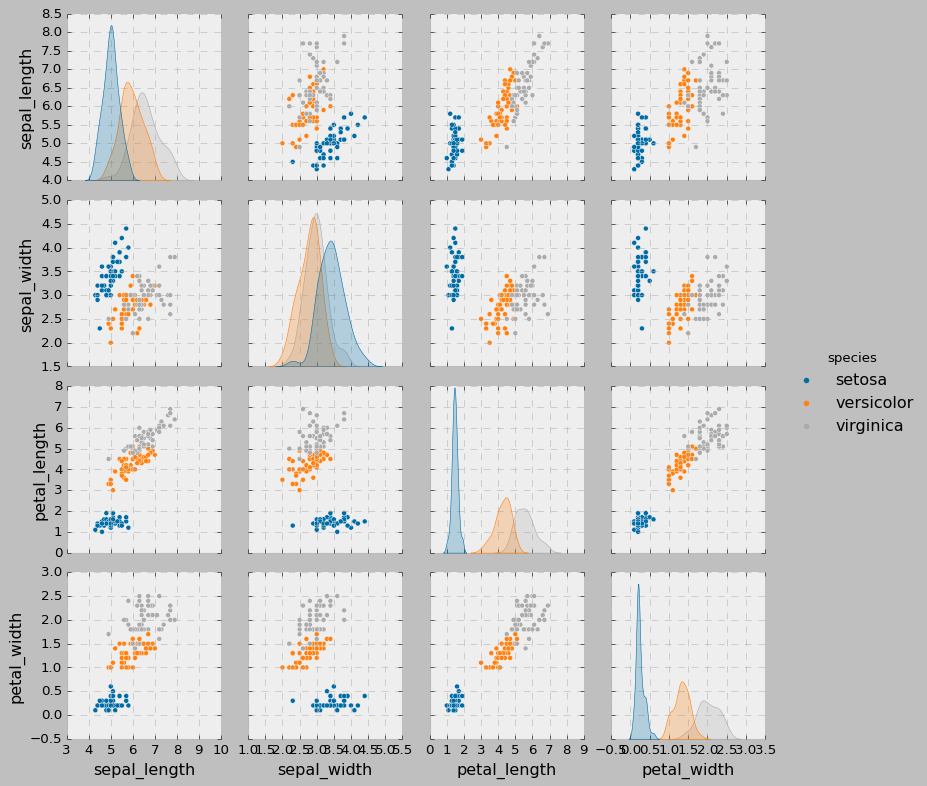

In [129]:
sns.pairplot(iris, hue='species')
# 컬럼명 안에 있는 값을 이거대로 구분시켜라는거임. 
# seaborn 사용하면 너무 좋다. 